In [20]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
from google.colab import files
uploaded = files.upload()

Saving samplefile.csv to samplefile (1).csv


In [38]:
sampledata = pd.read_csv('samplefile (1).csv')

In [39]:
sampledata

,Vegitation,NDVI,NDWI1,CAI,EVI,GNDVI,SAVI,MSI,ARI,DWSI,CVI
0,"Dec 3, 2020",0.281,-0.259,0.801,0.213,0.259,0.171,1.036,1.770,1.050,2.333
1,"Dec 5, 2020",0.335,-0.307,0.790,0.262,0.307,0.201,1.082,2.026,1.069,2.682
2,"Dec 8, 2020",0.342,-0.316,0.800,0.262,0.316,0.208,0.939,2.231,1.061,2.809
3,"Dec 10, 2020",0.401,-0.401,0.840,0.266,0.401,0.247,1.004,3.507,1.007,3.963
4,"Dec 15, 2020",0.356,-0.317,0.788,0.350,0.317,0.247,0.777,1.140,1.095,2.223
...,...,...,...,...,...,...,...,...,...,...,...
99,"Feb 13, 2022",0.357,-0.340,0.824,0.408,0.340,0.286,0.805,1.133,1.041,2.460
100,"Feb 16, 2022",0.357,-0.351,0.835,0.386,0.351,0.281,0.823,1.208,1.016,2.596
101,"Feb 18, 2022",0.377,-0.370,0.848,0.458,0.370,0.308,0.766,1.231,1.019,2.792
102,"Feb 21, 2022",0.405,-0.401,0.827,0.457,0.401,0.327,0.760,1.536,1.011,3.020


In [40]:
sampledata.shape

(104, 11)

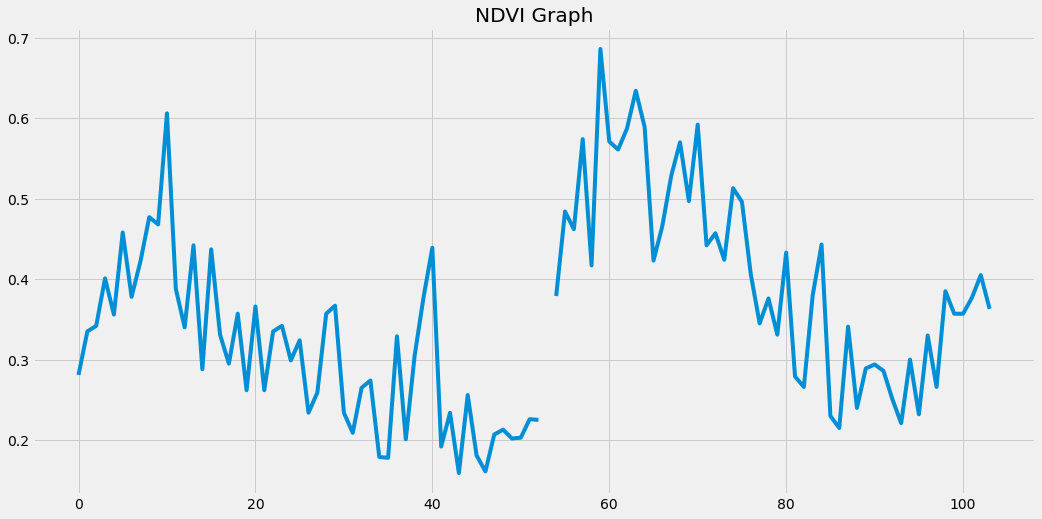

In [41]:
plt.figure(figsize=(16,8))
plt.title('NDVI Graph')
plt.plot(sampledata['NDVI'])
plt.show()

In [42]:
data = sampledata.filter(['NDVI'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

84

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.23149905],
       [0.33396584],
       [0.34724858],
       [0.45920304],
       [0.37381404],
       [0.56736243],
       [0.41555977],
       [0.49905123],
       [0.60341556],
       [0.58633776],
       [0.84819734],
       [0.4345351 ],
       [0.34345351],
       [0.5370019 ],
       [0.24478178],
       [0.52751423],
       [0.32637571],
       [0.25806452],
       [0.37571157],
       [0.19544592],
       [0.39278937],
       [0.19544592],
       [0.33396584],
       [0.34724858],
       [0.26565465],
       [0.31309298],
       [0.14231499],
       [0.18975332],
       [0.37571157],
       [0.39468691],
       [0.14231499],
       [0.09487666],
       [0.20113852],
       [0.21821632],
       [0.03795066],
       [0.03605313],
       [0.32258065],
       [0.07969639],
       [0.27703985],
       [0.41366224],
       [0.5313093 ],
       [0.0626186 ],
       [0.14231499],
       [0.        ],
       [0.18406072],
       [0.04174573],
       [0.00379507],
       [0.091

In [57]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.23149905, 0.33396584, 0.34724858, 0.45920304, 0.37381404,
       0.56736243, 0.41555977, 0.49905123, 0.60341556, 0.58633776,
       0.84819734, 0.4345351 , 0.34345351, 0.5370019 , 0.24478178,
       0.52751423, 0.32637571, 0.25806452, 0.37571157, 0.19544592,
       0.39278937, 0.19544592, 0.33396584, 0.34724858, 0.26565465,
       0.31309298, 0.14231499, 0.18975332, 0.37571157, 0.39468691,
       0.14231499, 0.09487666, 0.20113852, 0.21821632, 0.03795066,
       0.03605313, 0.32258065, 0.07969639, 0.27703985, 0.41366224,
       0.5313093 , 0.0626186 , 0.14231499, 0.        , 0.18406072,
       0.04174573, 0.00379507, 0.09108159, 0.10246679, 0.08159393,
       0.08349146, 0.12713472, 0.12523719,        nan, 0.41745731,
       0.61669829, 0.57495256, 0.78747628, 0.48956357, 1.        ])]
[0.781783681214421]



In [58]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(24, 60, 1)

In [60]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [61]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

24/24 [==============================] - 4s 25ms/step - loss: nan


In [50]:
#Creating the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [51]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [52]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
#Get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [54]:
#Get the Root Mean Squared Error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


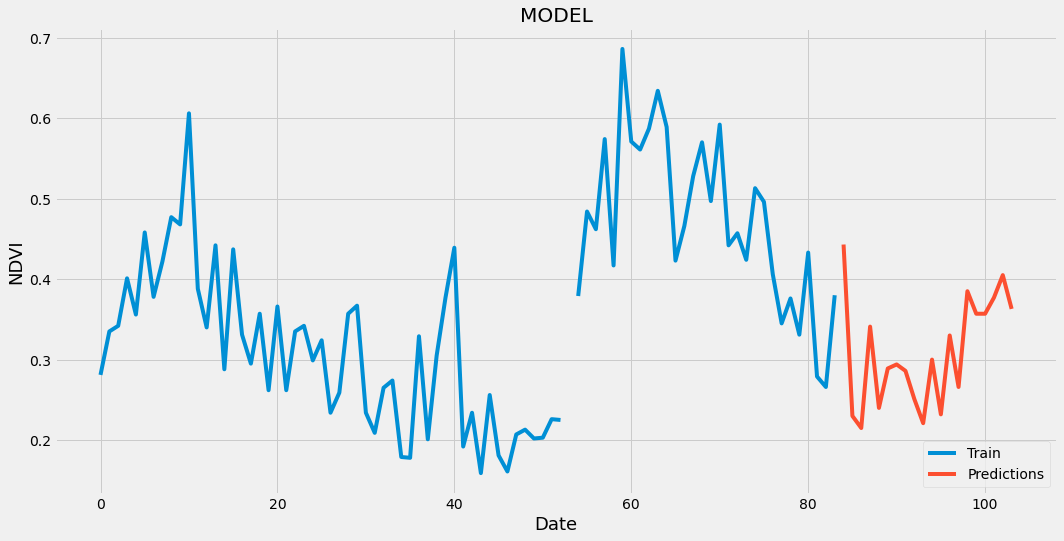

In [63]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('MODEL')
plt.xlabel('Date', fontsize=18)
plt.ylabel('NDVI', fontsize=18)
plt.plot(train['NDVI'])
plt.plot(valid[['NDVI','Predictions']])
plt.legend(['Train','Predictions'], loc='lower right')
plt.show()